<a href="https://colab.research.google.com/github/JemiJey/deeplearningai/blob/master/Cat_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-10-11 10:50:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c18::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   138MB/s    in 0.5s    

2019-10-11 10:50:50 (138 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 637kB/s 
     |████████████████████████████████| 3.8MB 42.9MB/s 
     |████████████████████████████████| 450kB 44.6MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0rc3
    Uninstalling tensorflow-1.15.0rc3:
      Successfully uninstalled tensorflow-1.15.0rc3


In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

validation_cat_dir = os.path.join(validation_dir, 'cats')
validation_dog_dir = os.path.join(validation_dir, 'dogs')

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [0]:
model.compile(optimizer=RMSprop(lr=0.001),
             loss  = 'binary_crossentropy',
             metrics = ['acc'])

In [10]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                 batch_size = 20,
                                 class_mode = 'binary',
                                 target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(validation_dir,
                                                 batch_size =20,
                                                 class_mode = 'binary',
                                                  target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
model.fit_generator(train_generator, 
                   validation_data = test_generator,
                   steps_per_epoch = 100,
                   epochs = 15,
                   validation_steps = 50,
                   verbose = 2)

Epoch 1/15
100/100 - 74s - loss: 0.7425 - acc: 0.5600 - val_loss: 0.6629 - val_acc: 0.6550
Epoch 2/15
100/100 - 74s - loss: 0.6352 - acc: 0.6640 - val_loss: 0.8586 - val_acc: 0.5540
Epoch 3/15
100/100 - 74s - loss: 0.5491 - acc: 0.7240 - val_loss: 0.7488 - val_acc: 0.6180
Epoch 4/15
100/100 - 74s - loss: 0.4561 - acc: 0.7830 - val_loss: 0.6160 - val_acc: 0.7260
Epoch 5/15
100/100 - 74s - loss: 0.3761 - acc: 0.8295 - val_loss: 0.7284 - val_acc: 0.6790
Epoch 6/15
100/100 - 75s - loss: 0.2844 - acc: 0.8815 - val_loss: 0.7771 - val_acc: 0.6880
Epoch 7/15
100/100 - 74s - loss: 0.1911 - acc: 0.9205 - val_loss: 0.8937 - val_acc: 0.7270
Epoch 8/15
100/100 - 73s - loss: 0.1367 - acc: 0.9520 - val_loss: 0.9230 - val_acc: 0.7280
Epoch 9/15
100/100 - 74s - loss: 0.0909 - acc: 0.9655 - val_loss: 1.3083 - val_acc: 0.6990
Epoch 10/15
100/100 - 73s - loss: 0.0794 - acc: 0.9775 - val_loss: 1.2273 - val_acc: 0.7160
Epoch 11/15
100/100 - 73s - loss: 0.0469 - acc: 0.9840 - val_loss: 1.4115 - val_acc: 0.71

['cat.700.jpg', 'cat.344.jpg', 'cat.87.jpg', 'cat.142.jpg', 'cat.158.jpg', 'cat.118.jpg', 'cat.359.jpg', 'cat.266.jpg', 'cat.465.jpg', 'cat.445.jpg']
['dog.592.jpg', 'dog.503.jpg', 'dog.991.jpg', 'dog.321.jpg', 'dog.985.jpg', 'dog.114.jpg', 'dog.414.jpg', 'dog.920.jpg', 'dog.462.jpg', 'dog.143.jpg']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide


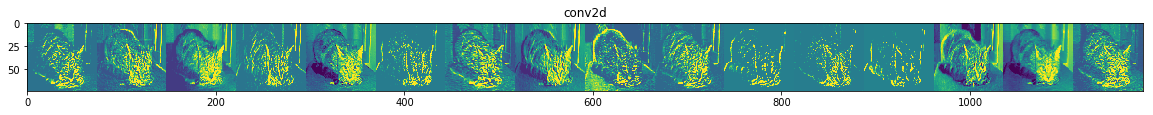

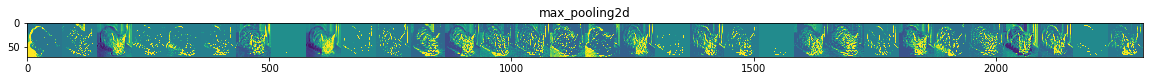

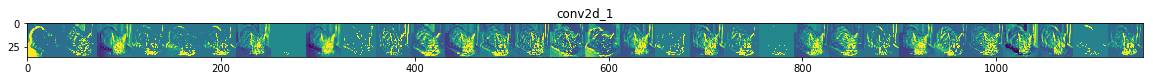

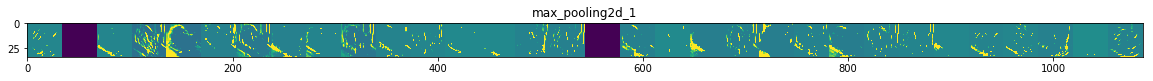

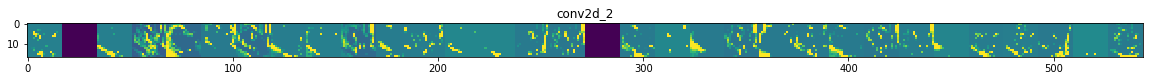

In [16]:
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cat_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dog_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

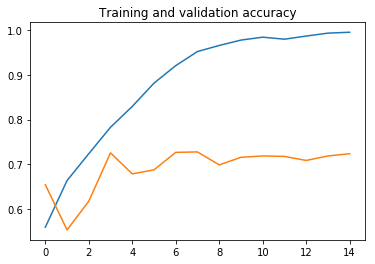

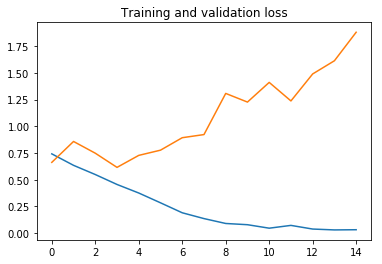

In [18]:

history = model.history



#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [19]:
acc = history.history['acc' ]
print(acc)

[0.56, 0.664, 0.724, 0.783, 0.8295, 0.8815, 0.9205, 0.952, 0.9655, 0.9775, 0.984, 0.9795, 0.9865, 0.993, 0.995]


In [21]:
val_acc = history.history['val_acc']
print(val_acc)

[0.655, 0.554, 0.618, 0.726, 0.679, 0.688, 0.727, 0.728, 0.699, 0.716, 0.719, 0.718, 0.709, 0.719, 0.724]


In [0]:
import os, signal

os.kill(os.getpid(),
       signal.SIGKILL)